In [1]:
import tensorflow as tf

2023-05-11 16:29:38.832872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 16:29:40.124222: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-05-11 16:29:40.124284: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-05-11 16:29:40.124289: W tensorflow/compiler/tf

In [2]:
import pandas as pd
heart_df=pd.read_csv('./datasets/heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
pd.Series.max(heart_df['Oldpeak'])

6.2

In [4]:
heart_df['Oldpeak'].value_counts()

Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

In [5]:
X=heart_df.iloc[:,:11]
y=heart_df.iloc[:,-1]
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [6]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [7]:
cat=[]
num=[]
for col in X.columns:
    if len(heart_df[col].unique()) < 5:
        cat.append(col)
    else:
        num.append(col)

In [8]:
cat, num

(['Sex',
  'ChestPainType',
  'FastingBS',
  'RestingECG',
  'ExerciseAngina',
  'ST_Slope'],
 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat:
    X[col]=le.fit_transform(X[col])

In [10]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [12]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
328,52,1,0,95,0,1,1,82,1,0.8,1
459,41,1,0,104,0,0,2,111,0,0.0,2
359,53,1,2,105,0,0,1,115,0,0.0,1
413,56,1,2,125,0,1,1,98,0,-2.0,1
46,37,1,0,120,223,0,1,168,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
906,55,0,1,132,342,0,1,166,0,1.2,2
98,56,1,0,120,85,0,1,140,0,0.0,2
165,46,1,3,140,272,1,1,175,0,2.0,1
512,35,1,2,123,161,0,2,153,0,-0.1,2


In [13]:
y.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
for col in num:
    X_train[col]=sc.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col]=sc.transform(X_test[col].values.reshape(-1, 1))

In [15]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
143,0.500000,1,0,0.500000,0.402985,0,1,0.669014,0,0.243902,2
822,0.604167,1,2,0.208333,0.398010,0,0,0.661972,1,0.317073,1
840,0.250000,1,1,0.458333,0.336650,0,1,0.507042,0,0.243902,1
798,0.270833,0,0,0.183333,0.439469,0,0,0.436620,0,0.317073,1
197,0.270833,1,1,0.583333,0.444444,0,1,0.535211,0,0.243902,2
...,...,...,...,...,...,...,...,...,...,...,...
604,0.812500,1,2,0.450000,0.421227,1,1,0.640845,1,0.243902,2
818,0.458333,1,0,0.500000,0.495854,0,1,0.795775,1,0.439024,2
669,0.333333,0,1,0.416667,0.388060,0,0,0.809859,0,0.317073,1
689,0.791667,0,0,0.216667,0.369818,0,1,0.577465,0,0.280488,2


In [16]:
X_train.shape

(642, 11)

In [17]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
328,0.479167,1,0,0.125000,0.000000,1,1,0.154930,1,0.341463,1
459,0.250000,1,0,0.200000,0.000000,0,2,0.359155,0,0.243902,2
359,0.500000,1,2,0.208333,0.000000,0,1,0.387324,0,0.243902,1
413,0.562500,1,2,0.375000,0.000000,1,1,0.267606,0,0.000000,1
46,0.166667,1,0,0.333333,0.369818,0,1,0.760563,0,0.243902,2
...,...,...,...,...,...,...,...,...,...,...,...
906,0.541667,0,1,0.433333,0.567164,0,1,0.746479,0,0.390244,2
98,0.562500,1,0,0.333333,0.140962,0,1,0.563380,0,0.243902,2
165,0.354167,1,3,0.500000,0.451078,1,1,0.809859,0,0.487805,1
512,0.125000,1,2,0.358333,0.266998,0,2,0.654930,0,0.231707,2


In [28]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(11,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            # optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
21/21 [==============================] - 1s 8ms/step - loss: 0.7606 - accuracy: 0.4299 - val_loss: 0.7103 - val_accuracy: 0.4855
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.4533 - val_loss: 0.6841 - val_accuracy: 0.5543
Epoch 3/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5841 - val_loss: 0.6567 - val_accuracy: 0.7500
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.7695 - val_loss: 0.6310 - val_accuracy: 0.7935
Epoch 5/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.8364 - val_loss: 0.6090 - val_accuracy: 0.8080
Epoch 6/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.8318 - val_loss: 0.5882 - val_accuracy: 0.8080
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.8364 - val_loss: 0.5578 - val_accuracy: 0.8043
Epoch 8/500
2

<Axes: >

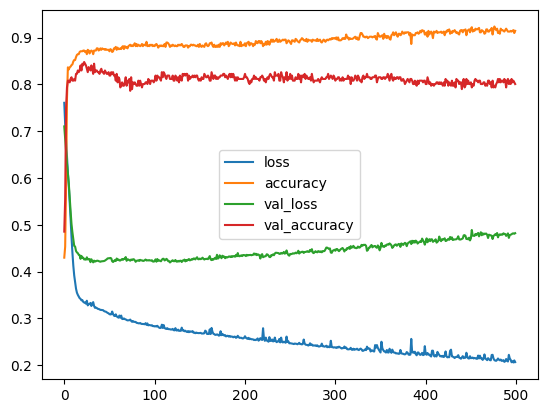

In [29]:
history=pd.DataFrame(history.history)
history.plot()

In [30]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 873us/step


In [31]:
y_pred

array([[2.15114713e-01],
       [6.17534816e-02],
       [1.71583787e-01],
       [5.29794693e-01],
       [1.69478040e-02],
       [2.92569604e-02],
       [9.67397571e-01],
       [1.19038410e-01],
       [2.77541250e-01],
       [9.60545063e-01],
       [1.09114842e-02],
       [8.65275323e-01],
       [9.63028610e-01],
       [9.94234145e-01],
       [9.72798169e-01],
       [7.03891218e-01],
       [9.58498776e-01],
       [9.35823977e-01],
       [9.91455972e-01],
       [9.56999958e-01],
       [9.58889842e-01],
       [3.85088436e-02],
       [9.42593396e-01],
       [8.65232408e-01],
       [7.05748796e-01],
       [2.40146928e-03],
       [9.84253109e-01],
       [8.00121725e-02],
       [5.46453178e-01],
       [8.46136749e-01],
       [1.86170696e-03],
       [1.32667884e-01],
       [8.00425470e-01],
       [1.05683999e-02],
       [9.94337022e-01],
       [6.17105067e-01],
       [6.70041889e-03],
       [1.03134545e-03],
       [1.19048152e-02],
       [4.14289767e-03],


In [32]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test,y_pred,figsize=(5,5)):
  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)
  

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [33]:
y_pred_rounded=y_pred.round()

In [34]:
y_pred_rounded

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],

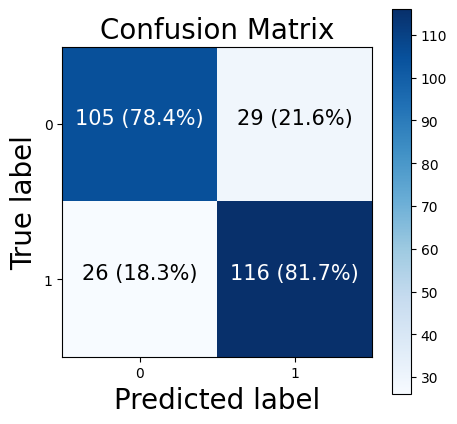

In [35]:
plot_confusion_matrix(y_test,y_pred_rounded)

In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.allow_custom_ops=True
converter.experimental_new_converter =True
tflite_model = converter.convert()

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11, 11), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fca26700>, 140295807560160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11, 11), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fca26700>, 140295807560160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fca3a1c0>, 140295807560240), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fca3a1c0>, 140295807560240), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc382cd0>, 140295807558480), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc382cd0>, 140295807558480), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc6fad90>, 140295807558320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc6fad90>, 140295807558320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 5), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc6e3220>, 140295807561600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 5), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc6e3220>, 140295807561600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc37f820>, 140295807559520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc37f820>, 140295807559520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99299aa2e0>, 140295807104784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99299aa2e0>, 140295807104784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99299c31c0>, 140295807105424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99299c31c0>, 140295807105424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11, 11), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fca26700>, 140295807560160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11, 11), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fca26700>, 140295807560160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fca3a1c0>, 140295807560240), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fca3a1c0>, 140295807560240), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc382cd0>, 140295807558480), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(11, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc382cd0>, 140295807558480), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc6fad90>, 140295807558320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc6fad90>, 140295807558320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 5), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc6e3220>, 140295807561600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 5), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc6e3220>, 140295807561600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc37f820>, 140295807559520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99fc37f820>, 140295807559520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99299aa2e0>, 140295807104784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99299aa2e0>, 140295807104784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99299c31c0>, 140295807105424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f99299c31c0>, 140295807105424), {}).


INFO:tensorflow:Assets written to: /tmp/tmphwr5ahss/assets


INFO:tensorflow:Assets written to: /tmp/tmphwr5ahss/assets
2023-05-11 16:13:49.996981: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-05-11 16:13:49.997008: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-05-11 16:13:49.997129: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmphwr5ahss
2023-05-11 16:13:49.998046: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-11 16:13:49.998059: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmphwr5ahss
2023-05-11 16:13:50.001082: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-05-11 16:13:50.028763: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmphwr5ahss
2023-05-11 16:13:50.035605: I tensorflow/cc/saved_model/loader.cc:305] SavedModel

In [ ]:
open("./artifacts/heart.tflite","wb").write(tflite_model)

4104